<a href="https://colab.research.google.com/github/salmon9/python/blob/main/lissajous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from matplotlib import pyplot as plt

In [5]:
class Model (nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1 = nn.Linear(1,20)
    self.l2 = nn.Linear(20,40)
    self.l3 = nn.Linear(40,1)

  def forward(self,x):
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = self.l3(x)
    return x 

In [6]:
def get_dataset(n):
    parameter = np.radians(np.random.randint(0,360,n)) #0〜360のランダム値 p:媒介変数
    x = np.sin(parameter) + np.random.normal(scale=0.01)
    y = 2*np.sin(2*parameter) + np.random.normal(scale=0.01)

    dataset = [x,y]
    dataset = torch.FloatTensor(dataset)

    return torch.utils.data.TensorDataset(dataset)

In [7]:
data_number = 10000 #準備するデータの数
batch_size  = 1000 # 1つのミニバッチのデータの数
data_loader = torch.utils.data.DataLoader(get_dataset(data_number), batch_size=batch_size)

In [8]:
model = Model()
criterion = nn.MSELoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
loss_log = [] # 学習状況のプロット用
epoch = 100
for t in range(epoch):
    for input in data_loader: # 1ミニバッチずつ計算
        optimizer.zero_grad() 
        
        output = model(input)

        loss = criterion(output,input)

        loss.backward()
        
        optimizer.step()
         

    print(t, loss.item())
    loss_log.append(loss.item())

0 0.3976731300354004
1 0.37426137924194336
2 0.3546639680862427
3 0.3275628983974457
4 0.29839789867401123
5 0.25991228222846985
6 0.19950585067272186
7 0.1400364339351654
8 0.0897602066397667
9 0.06434659659862518
10 0.059339750558137894
11 0.049958523362874985
12 0.0467204824090004
13 0.04334159195423126
14 0.03936244919896126
15 0.03627585247159004
16 0.03268442675471306
17 0.029602188616991043
18 0.027225425466895103
19 0.024792896583676338
20 0.022186608985066414
21 0.0201642457395792
22 0.019450802356004715
23 0.02056737430393696
24 0.02087641879916191
25 0.020618662238121033
26 0.017610372975468636
27 0.012741190381348133
28 0.011303475126624107
29 0.01135551929473877
30 0.008927710354328156
31 0.007983356714248657
32 0.009357440285384655
33 0.007172821555286646
34 0.006359002087265253
35 0.008323912508785725
36 0.005609429441392422
37 0.008191763423383236
38 0.004782222677022219
39 0.008242442272603512
40 0.004357208497822285
41 0.004080377519130707
42 0.005888353567570448
43 0

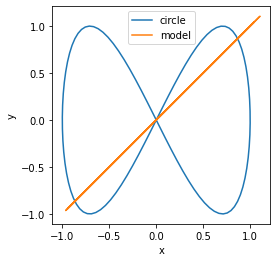

In [11]:
##学習したモデルと関数を比較する

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

p = np.radians(np.linspace(0,360,100))

plt.plot(np.sin(p),np.sin(2*p), label="circle")

p_model = torch.FloatTensor(p.reshape(100,1))
x_model = model(p_model)
y_model = model(p_model)

x = x_model.detach().numpy().reshape(1,100)[0]
y = y_model.detach().numpy().reshape(1,100)[0] # プロット用に変換、detach()が必要

plt.plot(x, y, label='model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()